![title](https://i.ibb.co/f2W87Fg/logo2020.png)

---



# Task 7 - Filtering and Edge Detection

Previously, you have tried implementing Convolution and use it for a few Image Processing tasks like shifting, blurring, and edge detection (Sobel). However, those convolution implementations were mostly intended for creating a Convolutional Layer for CNNs. That's why it's 3D shaped.

But this time, we will try the already built-in convolution operation from SciPy library and perform several classical computer vision tasks like Smoothing and Edge Detection.



---
---
#[Part 0] Import Libraries 

---
## 1 - Import Libraries

Write down your Name and Student ID

In [1]:
## --- start your code here ----

NIM = 1301170073
Nama = "Pratama Yoga Santosa"

## --- end your code here ----

Import required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.color import rgb2gray

---
## 2 - Helper Functions
below are helper functions to load an image and show a list of images

---
### a. Load Image

In [3]:
def load_image(filename):
    img = rgb2gray(plt.imread(filename))
    img = np.array(img)

    return img

---
### b. Show Images

In [4]:
def show_images(images, titles, width=4, figsize=(6,6) ):
    i, j = 0, 1
    k = len(images)
    if k>width:
        j = k//width+1
        k = width
    x = figsize[0]*k
    y = figsize[1]*j
    plt.rcParams['figure.figsize'] =  (x, y) 
    for img, title in zip(images, titles):
        i+=1
        plt.gray()
        plt.subplot(j, k, i)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

---
## 3 - Load an Image

Now let's download an image for us to use in this exercise. 

Below we have provided you an url to Lena test image, but you may change it to other image.

In [5]:
!wget -q -O 'input.png' 'https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/220px-Lenna_%28test_image%29.png'

Then let's visualize the image

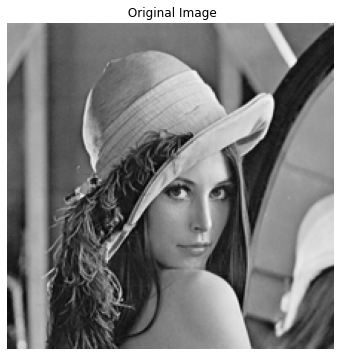

In [6]:
ori_img = load_image( 'input.png' )
show_images([ori_img], [' Original Image'])

---
---
#[Part 1] Filtering using Convolution

You have learned about filtering using convolution functions. Now it's the time to test it to filter an image using different kind of kernels

---
## 1 - Shift Left Kernel

You've learned about kernel to shift an image, so now implement a $5\times5$ kernel to perform the left shift operation

#### <font color='red'>**EXERCISE:** </font>
Complete the $5\times5$ shift kernel. Use `np.array()` or `np.zeros()`

In [12]:
shift_kernel = np.array([[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]])

print the kernel

In [13]:
print(shift_kernel)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


**EXPECTED OUTPUT**:
<pre>[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Now let's use the filter and convolve it into the image. Here we're using the `convolve` function from `ndimage.filters` library.

Shifting the image once may not be too visible the difference, so let's do it 5 times. 

Then visualize the result.

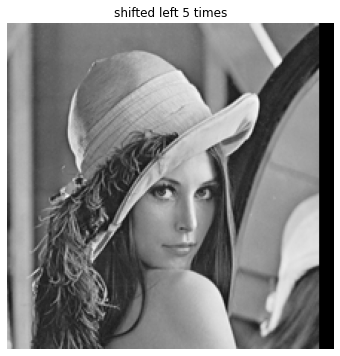

In [14]:
shifted = ori_img
for i in range(5):
    shifted = ndimage.filters.convolve(shifted, shift_kernel, mode='constant')

show_images([shifted], ['shifted left 5 times'])

**EXPECTED OUTPUT**:

<img src='https://i.ibb.co/FDYfG6Q/01-shift.png' height=150>

---
## 2 - Box Smoothing Kernel

You've also learned about Box Smoothing or Box Filtering. 

So now implement a kernel to perform the $5\times5$ Box Filtering

#### <font color='red'>**EXERCISE:** </font>
Complete the $ 5\times5 $ box kernel. Use `np.array()` or `np.ones()`

In [17]:
box_kernel = np.ones((5,5))-0.96


print the kernel

In [18]:
print(box_kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


**EXPECTED OUTPUT**:
<pre>[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]

Filter the image, then visualize the result.

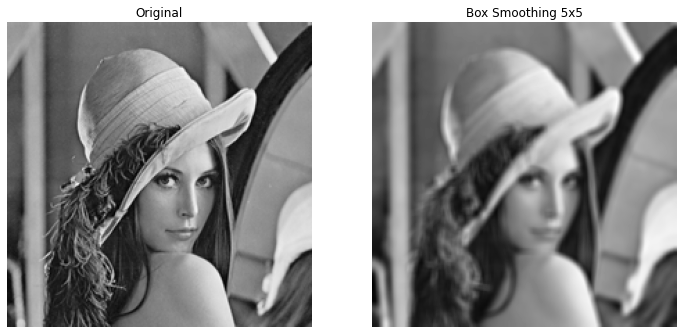

In [19]:
box_blur = ndimage.filters.convolve(ori_img, box_kernel)

show_images([ori_img, box_blur], ['Original','Box Smoothing 5x5'])

**EXPECTED OUTPUT**:

<img src='https://i.ibb.co/HPRs6nr/02-box.png' height=150>

---
## 3 - Detail Kernel

Now, what would happened if we substract the Original image with the box blurred image?

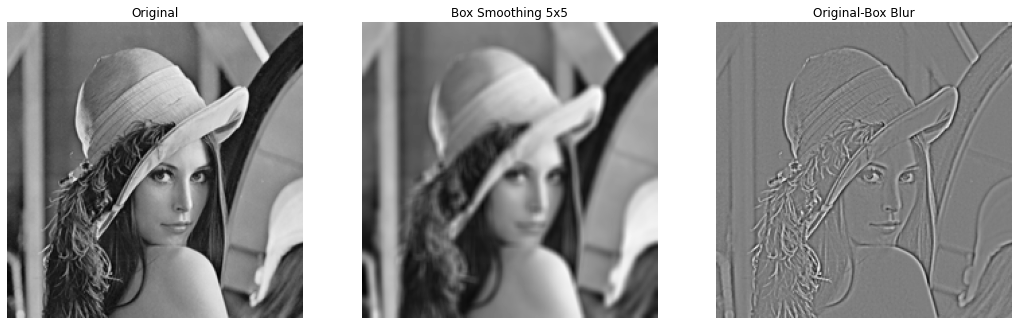

In [20]:
detail_1 = ori_img - box_blur

show_images([ori_img, box_blur, detail_1], ['Original','Box Smoothing 5x5', 'Original-Box Blur'])

Turns out we get the detail feature of the image.

And you've learned that Convolution is associative and distributes over addition. 

$$
I_1=(I*f_1)\qquad I_2=(I*f_2)
$$

$$
\begin{align}
I_1-I_2& = (I*f_1)-(I*f_2) \\
& = I*(f1-f2)\end{align}
$$
<br>

Therefore we can achieve the same result by calculating the third kernel as
$f_3=f_1-f_2$ <br> with $f_1$ is an identity kernel

<br>
$$
f_1 = \left[\begin{array}{ccccc}0&0&0&0&0\\
0&0&0&0&0\\0&0&1&0&0\\
0&0&0&0&0\\0&0&0&0&0\end{array}\right]
$$

#### <font color='red'>**EXERCISE:** </font>
Complete the $5\times5$ identity kernel. Use `np.array()` or `np.zeros()`

In [22]:
identity_kernel = np.array([[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],])


print the kernel

In [23]:
print(identity_kernel)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


**EXPECTED OUTPUT**:
<pre>[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

#### <font color='red'>**EXERCISE:** </font>
Complete the detail kernel by substracting identity kernel with box kernel

In [27]:
detail_kernel = np.array([[-0.04, -0.04, -0.04, -0.04, -0.04],
 [-0.04, -0.04, -0.04, -0.04, -0.04],
 [-0.04, -0.04,  0.96, -0.04, -0.04],
 [-0.04, -0.04, -0.04, -0.04, -0.04],
 [-0.04, -0.04, -0.04, -0.04, -0.04],])

print the kernel

In [28]:
print(detail_kernel)

[[-0.04 -0.04 -0.04 -0.04 -0.04]
 [-0.04 -0.04 -0.04 -0.04 -0.04]
 [-0.04 -0.04  0.96 -0.04 -0.04]
 [-0.04 -0.04 -0.04 -0.04 -0.04]
 [-0.04 -0.04 -0.04 -0.04 -0.04]]


**EXPECTED OUTPUT**:
<pre>[[-0.04 -0.04 -0.04 -0.04 -0.04]
 [-0.04 -0.04 -0.04 -0.04 -0.04]
 [-0.04 -0.04  0.96 -0.04 -0.04]
 [-0.04 -0.04 -0.04 -0.04 -0.04]
 [-0.04 -0.04 -0.04 -0.04 -0.04]]

Now filter the image and visualize the result.

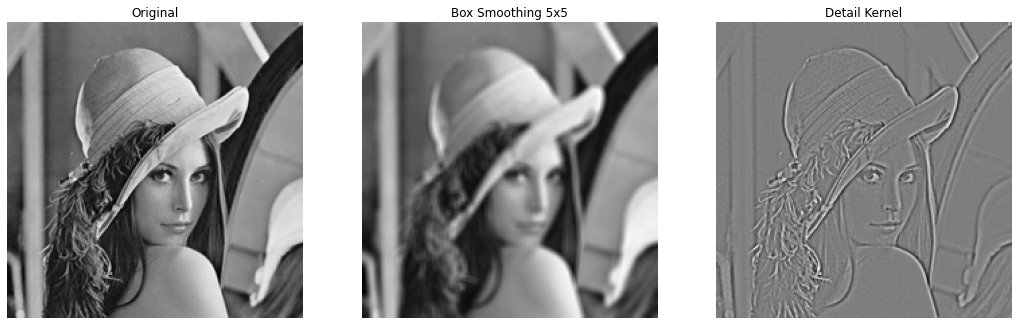

In [29]:
detail_2 = ndimage.filters.convolve(ori_img, detail_kernel)

show_images([ori_img, box_blur, detail_2], ['Original','Box Smoothing 5x5', 'Detail Kernel'])

**EXPECTED OUTPUT**:

<img src='https://i.ibb.co/YDQcqsr/02b-detail.png' height=150>

---
## 4 - Gaussian Smoothing Kernel

Next is the gaussian filtering. This is different from the previous two, here you actually need a function to build the kernel

Gaussian function is defined as:<br>

$$
g(x, y) = \frac{1}{2\pi\sigma^2}\exp{(-\dfrac{x^2+y^2}{2\sigma^2})}
$$

#### <font color='red'>**EXERCISE:** </font>
Complete the Gaussian Function. Use `np.pi`

In [41]:
def gaussian_fn(size=3, sigma=1):

    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]

    g = (1/(2*np.pi*(sigma**2)))*np.exp(-((x**2 + y**2) / (2*(sigma**2))))

    return g

Now create a $5\times5$ Gaussian Kernel with standard deviation of 1.4

#### <font color='red'>**EXERCISE:** </font>
Call the Gaussian Function with `size=5` and `sigma=1.4`

In [42]:
gauss_kernel = gaussian_fn(5, 1.4)

You've seen how to use the `convolve` function, now use it to perform Gaussian Smoothing to the image

#### <font color='red'>**EXERCISE:** </font>
Call `ndimage.filters.convolve` with input `ori_img` and `gauss_kernel`

In [43]:
gauss_blur = ndimage.filters.convolve(ori_img, gauss_kernel)

Now let's visualize the filter and the gaussian smoothing result

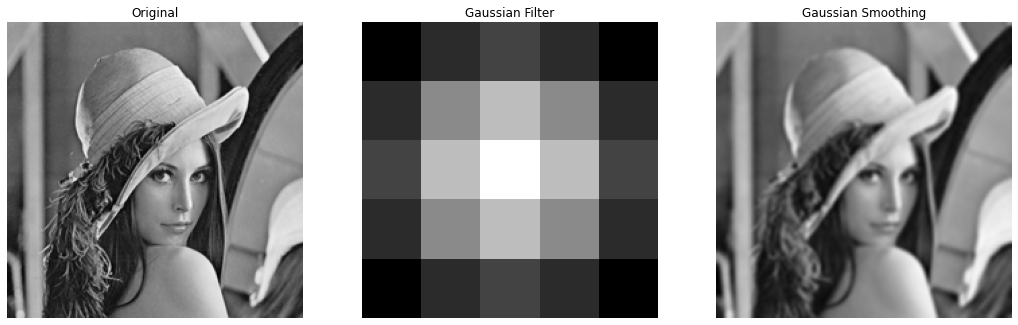

In [44]:
images = [ori_img, gauss_kernel, gauss_blur]
titles = ['Original', 'Gaussian Filter', 'Gaussian Smoothing']
show_images(images, titles)

**EXPECTED OUTPUT**:

<img src='https://i.ibb.co/Q8hX28J/03-gaus1.png' height=150>

Let's compare the result between Box Filter and Gaussian Filter

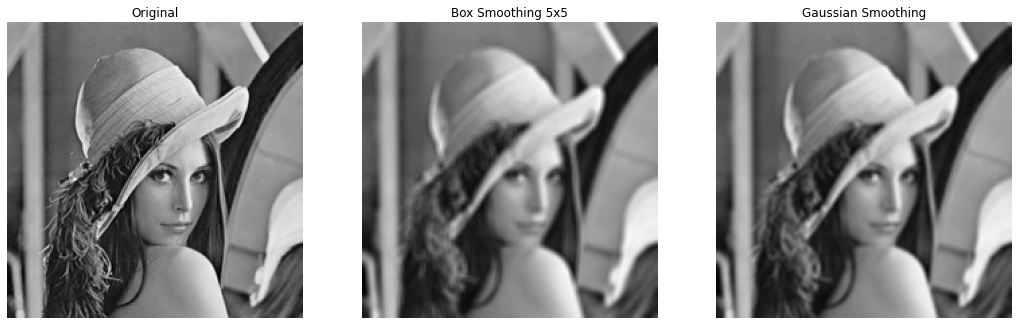

In [45]:
images = [ori_img, box_blur, gauss_blur]
titles = ['Original', 'Box Smoothing 5x5', 'Gaussian Smoothing']
show_images(images, titles)

**EXPECTED OUTPUT**:

<img src='https://i.ibb.co/2Nxdk2s/04-gaus2.png' height=150>

---
---
# [Part 2] Sobel Edge Detector
Moving on, now we will implement two famous Edge Detection Algorithms: Sobel Edge Detector and Canny Edge Detector.

Sobel operator or Sobel filter creates an image emphasising edges. Technically, it is a discrete differentiation operator, computing an approximation of the gradient of the image intensity function.


---
## 1 - Image Gradient


Sobel Edge Detector defined by computing the image derivative in $x$ and $y$ direction, then calculate the Gradient Magnitude $(G)$. 

The Sobel operator ended by thresholding the magnitude.

The kernels for Sobel Operator are defined as:

<br>

$$
K_x=\left[ \begin{array}{ccc}-1 &0 &1\\-2 &0 &2\\-1 &0 &1 \end{array} \right] \qquad K_y=\left[ \begin{array}{ccc}1 &2 &1\\0 &0 &0\\-1 &-2 &-1 \end{array} \right]
$$

<br>

While computing the gradient, here we'll also compute the Gradient Orientation $(\theta)$ to use it later in Canny Edge Detector

#### <font color='red'>**EXERCISE:** </font>
Complete the Sobel Filtering Function

In [46]:
def sobel_filter(img):

    #define the kernels
    Kx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    Ky = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

    # convolve each kernel to input image
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)

    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)

    return G, theta

With that, let's calculate the gradient magnitude from original image using sobel filter

In [47]:
g_ori, t_ori = sobel_filter(ori_img)

Now to visualize the gradient magnitude and orientation

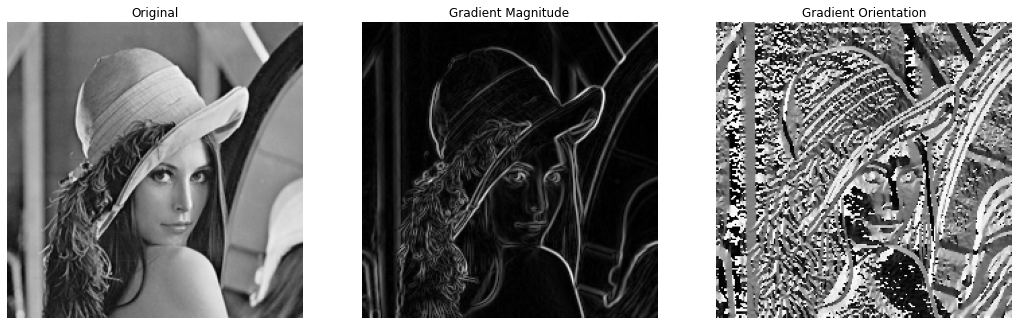

In [48]:
images = [ori_img, g_ori, t_ori ]
titles = ['Original', 'Gradient Magnitude', 'Gradient Orientation']
show_images(images, titles)

**EXPECTED OUTPUT**:

<img src='https://i.ibb.co/8sQ6VQ8/05-ori-grad.png' height=150>

You should see that using Sobel Operator we can already detect the edges

---
## 2 - SciPy Sobel Library

Now let's compare our implementation with the Sobel funtion from SciPy Library

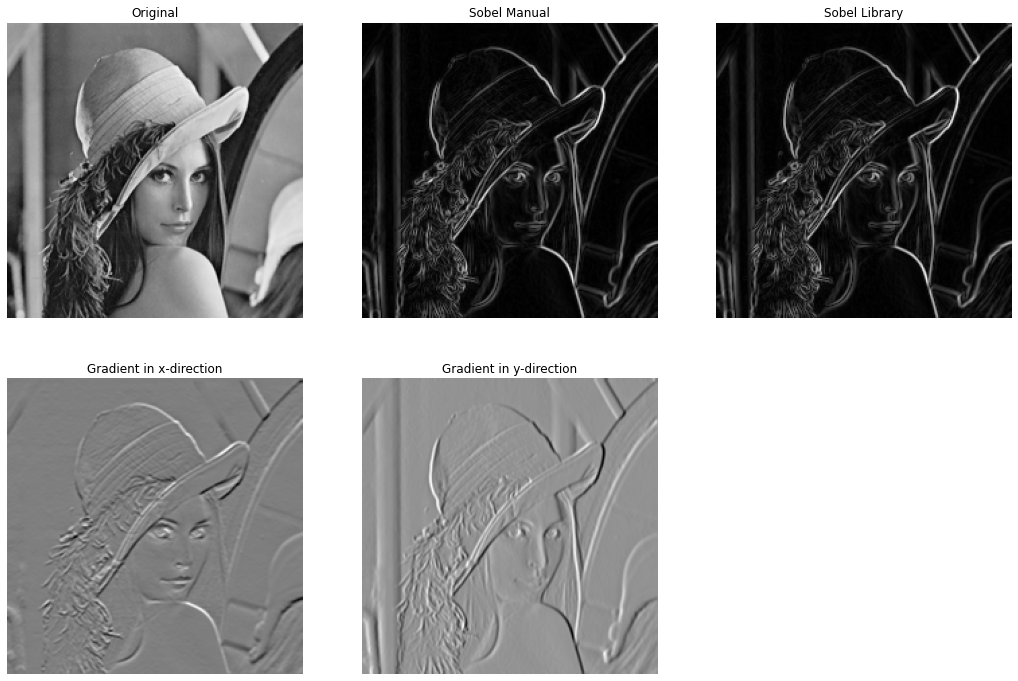

In [49]:
Ix    = ndimage.sobel(ori_img,0)
Iy    = ndimage.sobel(ori_img,1)
lib_sobel = np.hypot(Ix,Iy)

images = [ori_img, g_ori, lib_sobel, Ix, Iy ]
titles = ['Original', 'Sobel Manual', 'Sobel Library', 'Gradient in x-direction', 'Gradient in y-direction']
show_images(images, titles, width=3)

The results of your implementation should match those of the sobel library

---
---
# [Part 3] Canny Edge Detector
The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986. This technique dramatically reduce the amount of data to be processed and has been widely applied in various computer vision systems. 


---
## 1 - Gaussian Smoothing

Since all edge detection results are easily affected by the noise in the image, it is essential to filter out the noise to prevent false detection caused by it.

Here, Canny use Gaussian filtering to smoothen the image.

Since we have already performed Gaussian Smoothing up above, so we can just use the `gauss_blur` result

---
## 2 - Gradient Intensity

The next step is to use the Sobel Filter to the blurred image to get the gradient magnitudes and its orientations.

And we've already implemented the `sobel_filter()` before, so

#### <font color='red'>**EXERCISE:** </font>
call `sobel_filter()` function with input `gauss_blur`

In [50]:
g_blur, t_blur = sobel_filter(gauss_blur)

Now let's visualize the gradient magnitude and orientation. 

Along with that, let's also compare it with the result of sobel operator in the original image

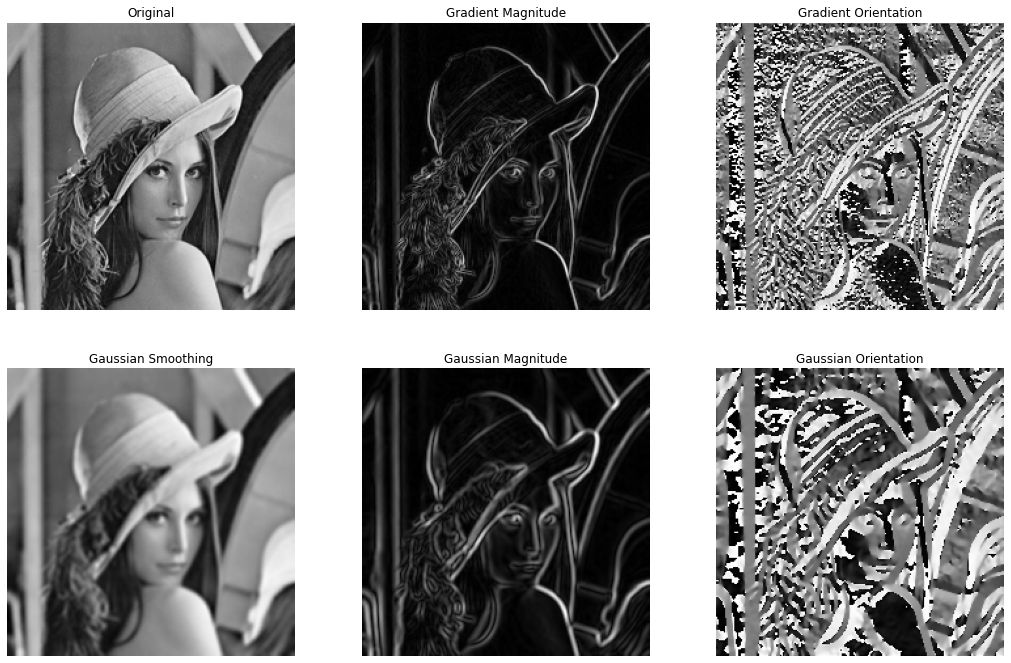

In [51]:
images = [ori_img, g_ori, t_ori, gauss_blur, g_blur, t_blur ]
titles = ['Original', 'Gradient Magnitude', 'Gradient Orientation', 
          'Gaussian Smoothing', 'Gaussian Magnitude', 'Gaussian Orientation']
show_images(images, titles, width=3)

**EXPECTED OUTPUT**:

<img src='https://i.ibb.co/HHZSBJ8/07-ori-sobel.png' height=300>

You should see that as we reduce the noise, we also achieved thicker edge blob from the blurred image. And that's not good

---
## 3 - Non-Maximum Suppression

That's why the next step is to mitigate the thick edges, as ideally, the final edge image should have thin edges. Thus, we must perform non-maximum suppression to thin out the edges.

The principle is simple: the algorithm goes through all the points on the gradient intensity matrix and finds the pixels with the maximum value in the edge directions

<center>
<img src='https://i.ibb.co/WDSTsdY/14-non-max.png' height=300>
</center>

So we need to compare current pixel gradient (`gradient[i,j]`) with one pixel ahead in its direction (we call it `a`) and one pixel behind it (we call it `b`).

Since it's symmetrical, so we only need to compare in 4 directions:
<pre>              a              b
* angle 0  : [i  , j+1] and [i, j-1] 
* angle 45 : [i+1, j-1] and [i-1, j+1] 
* angle 90 : [i+1, j]   and [i-1, j] 
* ange 135 : [i+1, j+1] and [i-1, j-1]</pre>

#### <font color='red'>**EXERCISE:** </font>
complete the function

In [92]:
def non_max_suppression(gradient, direction):
        M, N = gradient.shape
        Z = np.zeros((M,N), dtype=np.int32)

        # calculate the angle based on
        # the gradient direction
        angle = direction * 180. / np.pi
        angle[angle < 0] += 180

        # loop through all pixels
        # get gradient one pixel ahead and behind
        # compare with current gradient
        for i in range(1,M-1):
            for j in range(1,N-1):
                try:
                    a = 255
                    b = 255

                   #angle 0
                    if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                        a = gradient[i,j+1]
                        b = gradient[i,j-1]
                    #angle 45
                    elif (22.5 <= angle[i,j] < 67.5):
                        a = gradient[i+1,j-1]
                        b = gradient[i-1,j+1]
                    #angle 90
                    elif (67.5 <= angle[i,j] < 112.5):
                        a = gradient[i+1,j]
                        b = gradient[i-1,j]
                    #angle 135
                    elif (112.5 <= angle[i,j] < 157.5):
                        a = gradient[i+1,j+1]
                        b = gradient[i-1,j-1]

                    # if current gradient is bigger
                    # store as final gradient
                    if (gradient[i,j] >= a) and (gradient[i,j] >= b):
                        Z[i,j] = gradient[i,j]
                    else:
                        Z[i,j] = 0

                except IndexError as e:
                    pass

        return Z

Now let's apply the non-max suppression function to the gradient

In [93]:
suppressed = non_max_suppression(g_blur, t_blur)

Then visualize the supressed edge

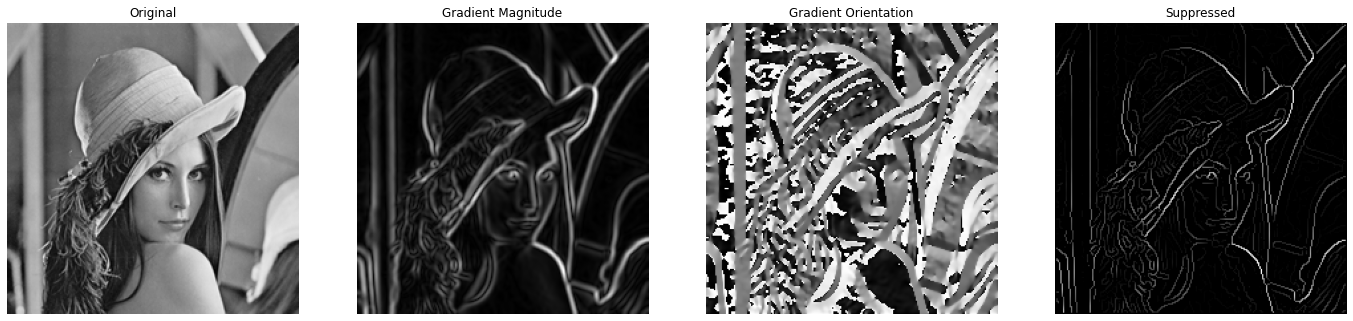

In [94]:
images = [ori_img, g_blur, t_blur, suppressed]
titles = ['Original', 'Gradient Magnitude', 'Gradient Orientation', 'Suppressed']
show_images(images, titles)

**EXPECTED OUTPUT**:

<img src='https://i.ibb.co/5vssTjM/08-suppressed.png' height=150>

You should see that now the edges have been thinned out, and it looks much more clean.

---
## 4 - Double Threshold

After the edges are suppressed, the image has thinner edges. We can however still notice some variation regarding the edges’ intensity: some pixels seem to be brighter than others, and we will try to cover this shortcoming with the two final steps.

The double threshold step aims to identify and normalized 3 kinds of pixels: strong, weak, and non-relevant. 

Basically:
* we set all pixel higher than `high_th` threshold into `strong_pixel` value, 
* set all pixel lower than `low_th` threshold into $0$, 
* and all between the thresholds into `weak_pixel` value.


#### <font color='red'>**EXERCISE:** </font>
complete the function

In [95]:
def double_threshold(img, weak_value=75, strong_value=255, low_th=0.05, high_th=0.15):

    high_th = img.max() * high_th;
    low_th = high_th * low_th;

    M, N = img.shape

    # create zeros matrix for the result
    # so that we don't need to filter the low value
    result = np.zeros((M,N))

    # find index of pixels higher than high_th
    # use np.where with condition img >= high_th
    strong_i, strong_j = np.where(img>=high_th)

    # find index of pixels between than low_th and high_th
    # use np.where with condition img < high_th & img >= low_th
    weak_i, weak_j = np.where((img < high_th) & (img >= low_th))

    # set strong and weak pixels with new value
    result[strong_i, strong_j] = strong_value
    result[weak_i, weak_j]     = weak_value

    return (result)

Now perform the double threshold to the suppressed edge

In [96]:
filtered = double_threshold(suppressed)

Then visualize the filtered edge

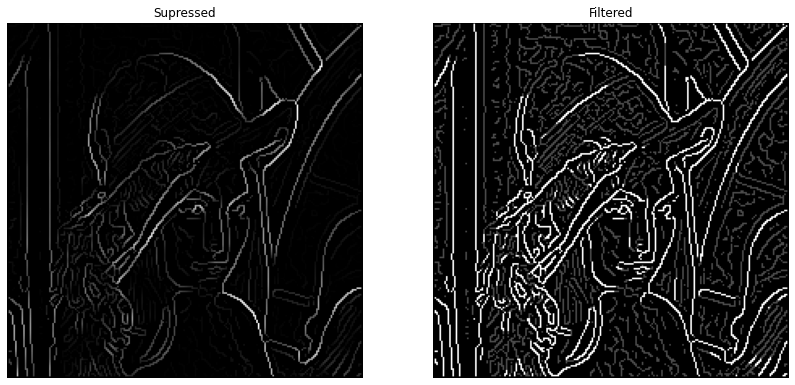

In [97]:
images = [suppressed, filtered]
titles = ['Supressed', 'Filtered']
show_images(images, titles, figsize=(7,8))

**EXPECTED OUTPUT**:

<img src='https://i.ibb.co/MZHd00f/09-suppressed-filtered.png' height=150>

You should see that now there are only 2 pixel intensity values (strong and weak)

Now if we visualize our progress, we can see that, gradually, the edges are becoming more clearer

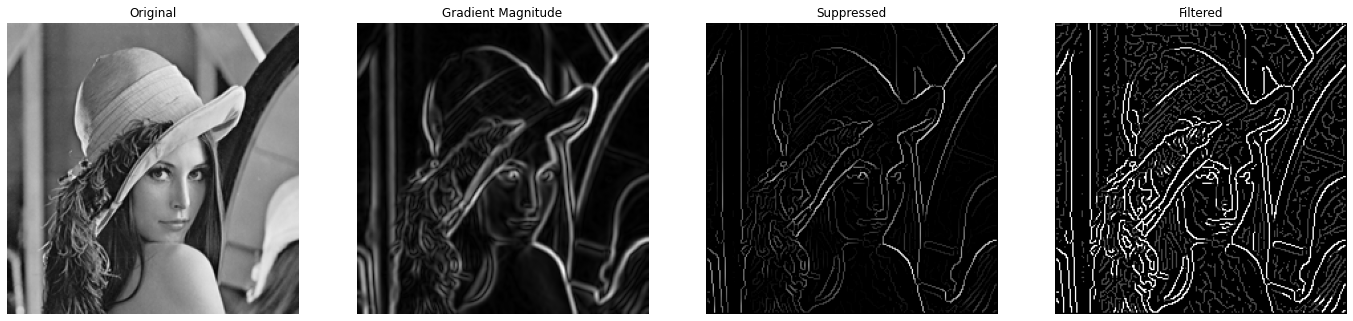

In [98]:
images = [ori_img, g_blur, suppressed, filtered]
titles = ['Original', 'Gradient Magnitude', 'Suppressed', 'Filtered']
show_images(images, titles)

**EXPECTED OUTPUT**:

<img src='https://i.ibb.co/thq69v6/10-filtered.png' height=150>

---
## 5 - Edge Tracking by Hysteresis

So far, the strong edge pixels should certainly be involved in the final edge image, as they are extracted from the true edges in the image. However, there will be some debate on the weak edge pixels, as these pixels can either be extracted from the true edge, or the noise/color variations. 

To achieve an accurate result, the weak edges caused by the latter reasons should be removed. 

Based on the threshold results, the hysteresis consists of transforming weak pixels into strong ones, if and only if at least one of the pixels around the one being processed is a strong one

<center>
<img src='https://miro.medium.com/max/675/1*jnqS5hbRwAmU-sgK552Mgg.png'>
</center>

#### <font color='red'>**EXERCISE:** </font>
complete the function

In [99]:
def hysteresis(img, weak_value=75, strong_value=255):

    M, N = img.shape
    img = img.copy()

    # loop through all pixels
    for i in range(1, M-1):
        for j in range(1, N-1):

            # if it is a weak valued pixel, 
            # check neighbor
            if (img[i,j] == weak_value):
                try:
                    # check if any of its 8 neighbors (adjacent pixels) is strong_value
                    if (
                        img[i+1,j-1] == strong_value or
                        img[i-1,j] == strong_value or
                        img[i,j-1] == strong_value or
                        img[i-1,j-1] == strong_value or
                        img[i,j+1] == strong_value or
                        img[i+1,j] == strong_value or
                        img[i+1,j+1] == strong_value or
                        img[i-1,j+1] == strong_value
                    ):
                        # if any, set this pixel as strong
                        img[i, j] = strong_value
                    else:
                        # else, delete
                        img[i, j] = 0
                except IndexError as e:
                    pass

    return img

And that's it.

Now we can apply `hysteresis` function to the filtered edge to get the final edge image

In [100]:
final_img = hysteresis(filtered)

Now to visualize all of the process

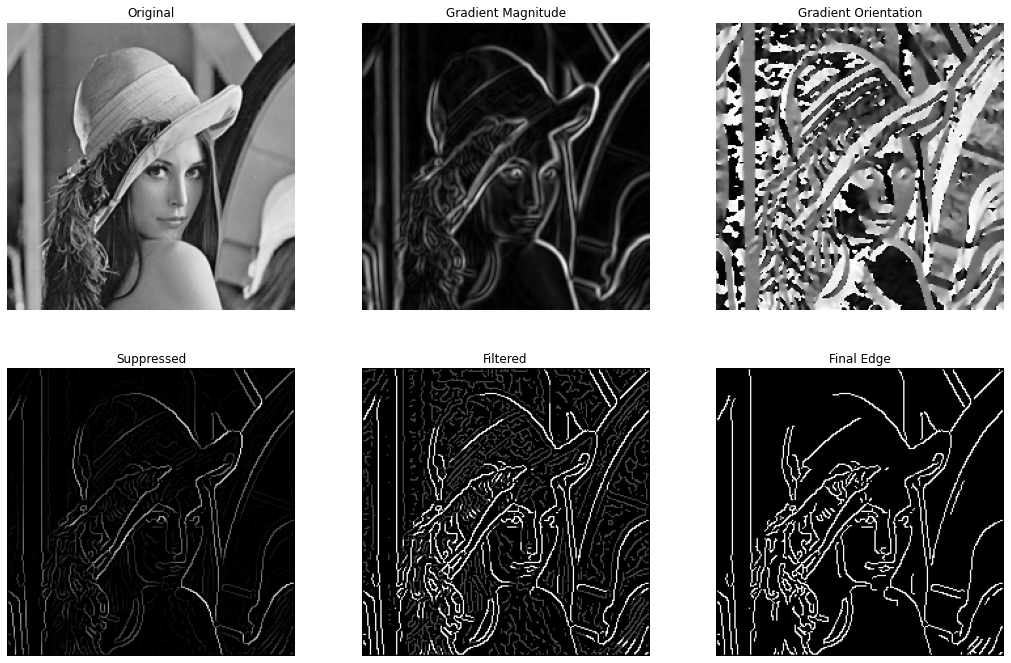

In [101]:
images = [ori_img, g_blur, t_blur, suppressed, filtered, final_img]
titles = ['Original', 'Gradient Magnitude', 'Gradient Orientation', 'Suppressed', 'Filtered', 'Final Edge']
show_images(images, titles, width=3)

**EXPECTED OUTPUT**:

<img src='https://i.ibb.co/2tJrh2s/11-final-edge.png' height=300>

You should see a clean edge on the final image.

If we compare to just the original image, we get

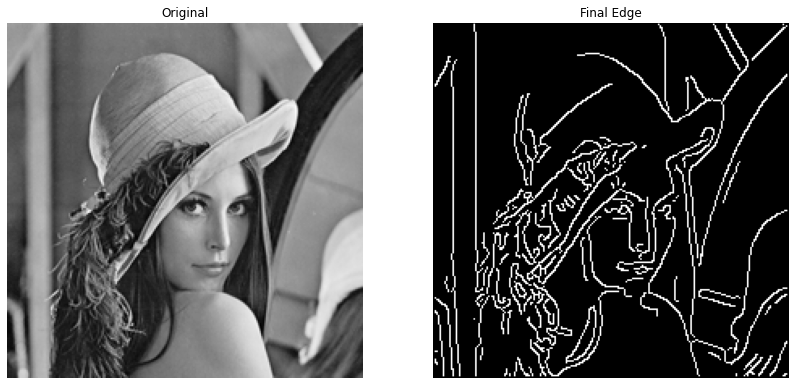

In [102]:
show_images([ori_img, final_img], ['Original', 'Final Edge'], figsize=(7,8))

**EXPECTED OUTPUT**:

<img src='https://i.ibb.co/sb830L7/12-final-edge.png' height=150>

---
## 6 - Complete Function

Just as an extra, let's gather and combine all those components together into one complete function.

In [103]:
def canny_detection(img, size=5, sigma=1.4, weak_value=75, strong_value=255, low_th=0.05, high_th=0.15):
    gauss_kernel = gaussian_fn(size=size, sigma=sigma)
    gauss_blur   = ndimage.filters.convolve(img, gauss_kernel)
    g_ori, t_ori = sobel_filter(gauss_blur)
    suppressed   = non_max_suppression(g_blur, t_blur)
    filtered     = double_threshold(suppressed, weak_value, strong_value, low_th, high_th)
    result       = hysteresis(filtered, weak_value, strong_value)

    return result


So now we can use it easily, and it should still results the same image

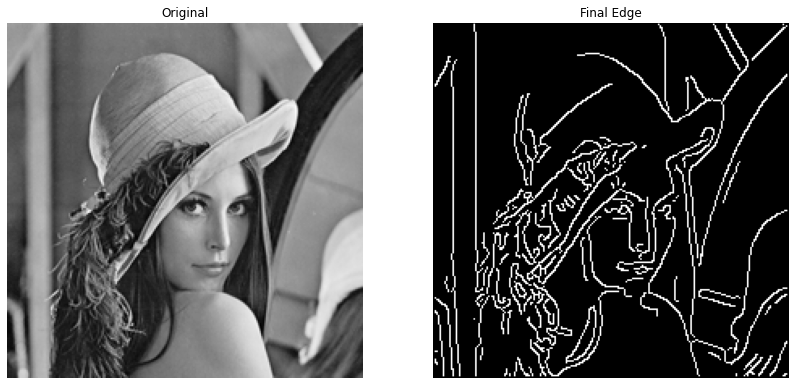

In [104]:
final_img = canny_detection(ori_img)
show_images([ori_img, final_img], ['Original', 'Final Edge'], figsize=(7,8))

---
## 7 - Scipy Canny Detector
Another extra, let's compare the result with the Canny Edge Detector module from Scikit Image Library.

Our implementation above uses `sigma=1.4`, so let's use it here too.

In [105]:
from skimage import feature
lib_canny = feature.canny(ori_img, sigma=1.4)

Then visualize and compare the results

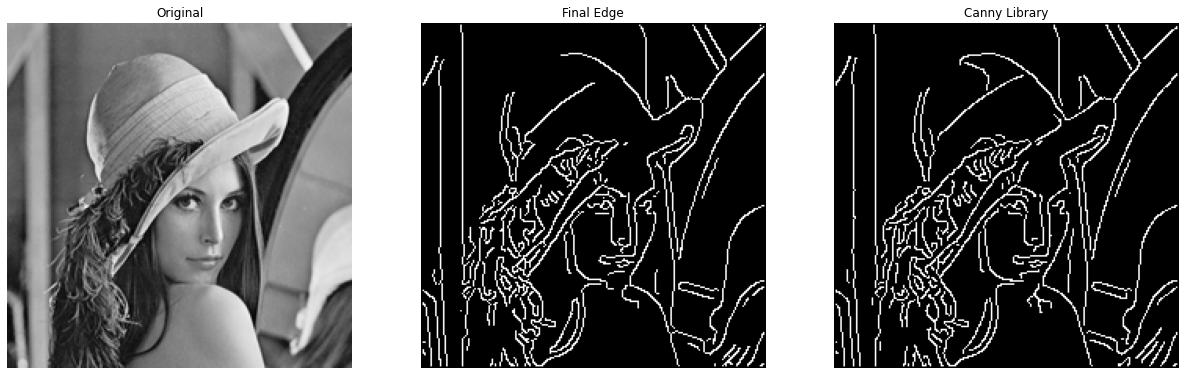

In [106]:
images = [ori_img, final_img, lib_canny]
titles = ['Original', 'Final Edge', 'Canny Library']
show_images(images, titles, figsize=(7,8))

**EXPECTED OUTPUT**:

<img src='https://i.ibb.co/gP45X7p/13-canny-lib.png' height=150>

Not bad, eh?
There're still some differences here and there, but overall our Canny Edge detector implementation has had pretty good results


---

# Congratulation, You've Completed Exercise 7

<p>Copyright &copy;  <a href=https://www.linkedin.com/in/andityaarifianto/>2020 - ADF</a> </p>

![footer](https://i.ibb.co/yX0jfMS/footer2020.png)